In [125]:
# World Happiness Report: Exploratory Data Analysis (2011–2024)

# This project explores global happiness trends using Gallup World Poll data, examining which factors explain happiness, how rankings change over time, and which countries over/underperform relative to expectations.


In [173]:
## INTRODUCTION
## Data is from: https://www.worldhappiness.report/data-sharing/


import pandas as pd
import matplotlib.pyplot as plt
import country_converter as coco
import seaborn as sns

gallup = pd.read_excel("data/WHR25.xlsx")
cc = coco.CountryConverter()

gallup['Continent'] = cc.convert(gallup['Country name'], to='continent', not_found=None)
gallup['Region']    = cc.convert(gallup['Country name'], to='UNregion', not_found=None)


gallup.head()

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Continent,Region
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782,Europe,Northern Europe
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Asia,Southern Asia
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976,Asia,Southern Asia
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263,Asia,Southern Asia
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895,Asia,Southern Asia


In [98]:
gallup.columns

Index(['Year', 'Rank', 'Country name', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Continent', 'Region'],
      dtype='object')

In [22]:
gallup['Country name'].unique()

array(['Finland', 'Afghanistan', 'Denmark', 'Albania', 'Iceland',
       'Algeria', 'Angola', 'Sweden', 'Argentina', 'Netherlands',
       'Armenia', 'Costa Rica', 'Australia', 'Norway', 'Austria',
       'Israel', 'Azerbaijan', 'Luxembourg', 'Bahrain', 'Mexico',
       'Bangladesh', 'Belarus', 'Belgium', 'New Zealand', 'Belize',
       'Switzerland', 'Benin', 'Bhutan', 'Bolivia', 'Ireland',
       'Bosnia and Herzegovina', 'Lithuania', 'Botswana', 'Brazil',
       'Canada', 'Bulgaria', 'Slovenia', 'Burkina Faso', 'Burundi',
       'Czechia', 'Cambodia', 'United Arab Emirates', 'Cameroon',
       'Germany', 'Central African Republic', 'United Kingdom', 'Chad',
       'United States', 'Chile', 'China', 'Poland', 'Colombia',
       'Taiwan Province of China', 'Comoros', 'Uruguay', 'Congo',
       'Kosovo', 'Kuwait', 'Côte d’Ivoire', 'Serbia', 'Croatia', 'Cuba',
       'Saudi Arabia', 'Cyprus', 'France', 'Singapore', 'Djibouti',
       'Romania', 'Dominican Republic', 'DR Congo', 'El Salv

In [24]:
gallup.shape

(1969, 13)

In [127]:
subset = gallup[gallup['Year']==2024][['Country name','Rank']].sort_values('Rank')
pd.concat([subset.head(10).reset_index(drop=True), subset.tail(10).reset_index(drop=True)], axis=1, keys=['Top 10','Bottom 10'])

Top 10          Bottom 10     
  Country name Rank  Country name Rank
0      Finland    1       Lesotho  138
1      Denmark    2       Comoros  139
2      Iceland    3         Yemen  140
3       Sweden    4      DR Congo  141
4  Netherlands    5      Botswana  142
5   Costa Rica    6      Zimbabwe  143
6       Norway    7        Malawi  144
7       Israel    8       Lebanon  145
8   Luxembourg    9  Sierra Leone  146
9       Mexico   10   Afghanistan  147

In [40]:
SArabia = gallup[gallup['Country name']=='Saudi Arabia'][['Year','Rank']].sort_values('Year')
SArabia

,Year,Rank
1512,2011,26
1511,2012,33
1510,2014,35
1509,2015,34
1508,2016,37
1507,2017,33
1506,2018,28
1505,2019,27
1504,2020,27
1503,2021,25


In [128]:
canada = gallup[gallup['Country name']=='Canada'][['Year','Rank']].sort_values('Year')
canada

,Year,Rank
306,2011,5
305,2012,6
304,2014,5
303,2015,6
302,2016,7
301,2017,7
300,2018,9
299,2019,11
298,2020,15
297,2021,15


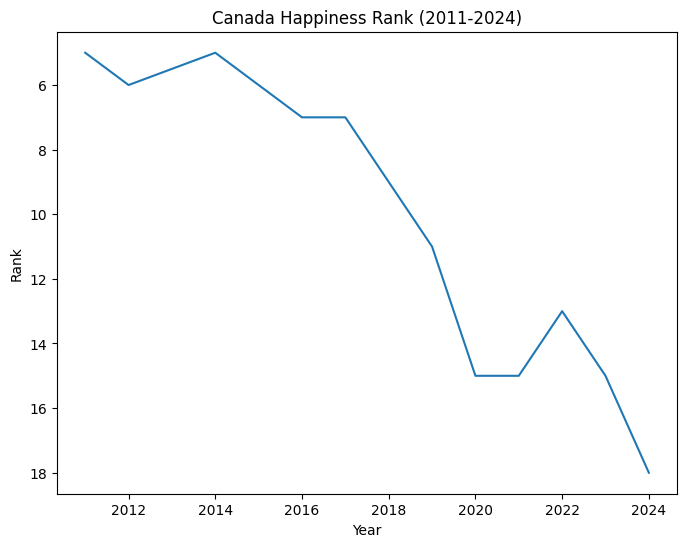

In [149]:
plt.figure(figsize=(8,6))
plt.plot(canada['Year'], canada['Rank'])
plt.gca().invert_yaxis() #so Rank1 is at the top


plt.title('Canada Happiness Rank (2011-2024)')
plt.xlabel('Year')
plt.ylabel('Rank')

plt.savefig("figures/CanadaHappinessRank.png", dpi=300)

plt.show()

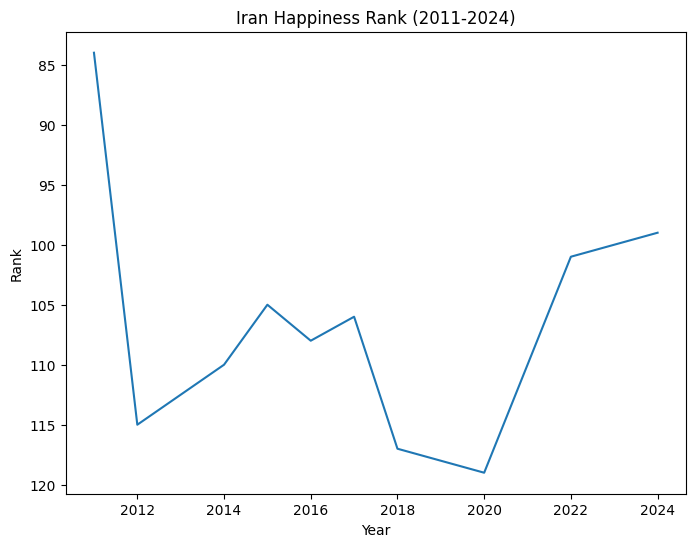

In [162]:
iran = gallup[gallup['Country name']=='Iran'][['Year', 'Rank']].sort_values('Year')
iran

plt.figure(figsize=(8,6))
plt.plot(iran['Year'], iran['Rank'])
plt.gca().invert_yaxis()
plt.title('Iran Happiness Rank (2011-2024)')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.savefig("figures/IranHappinessRank.png", dpi=300)
plt.show()

<Figure size 1000x600 with 0 Axes>

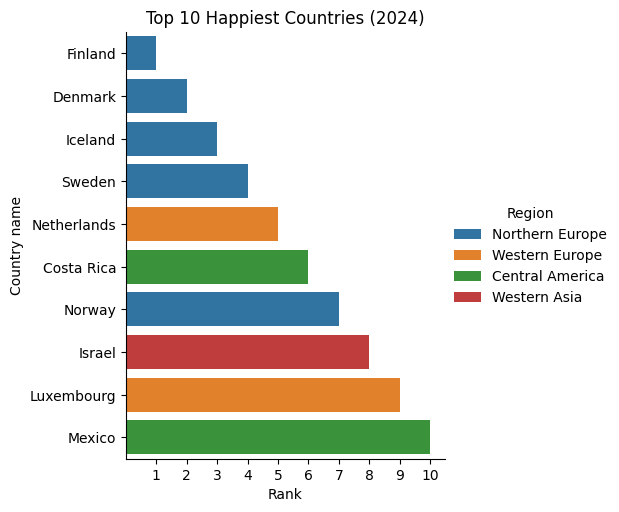

In [160]:
happiest = gallup[gallup['Year']==2024].sort_values('Rank').head(10)
plt.figure(figsize=(10,6))
sns.catplot(data=happiest, y="Country name", x="Rank", hue="Region", kind="bar", sharex=False)

plt.xticks(range(1,11))       # force ticks 1 to 10
plt.title("Top 10 Happiest Countries (2024)")
plt.xlabel("Rank")
plt.savefig("figures/Top10HappiestCountries.png", dpi=300, bbox_inches="tight")   


plt.show()

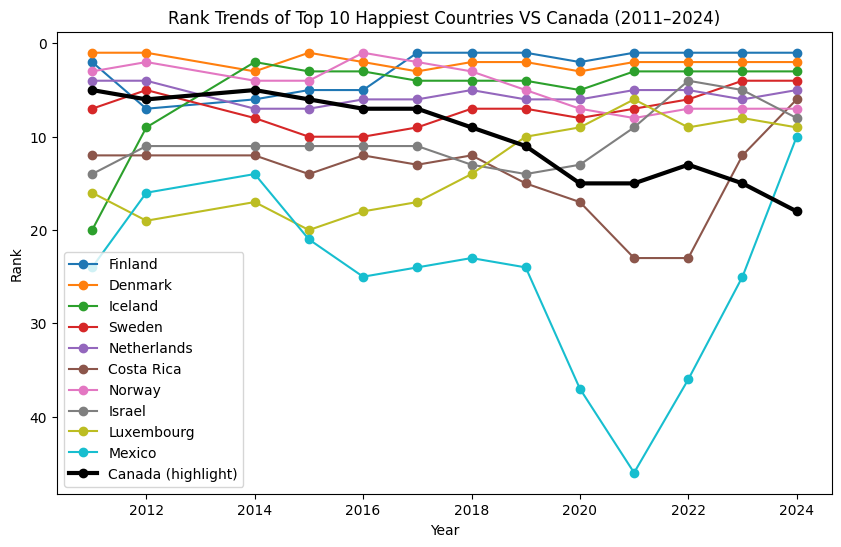

In [171]:
plt.figure(figsize=(10,6))
for c in happiest['Country name']:
    country = gallup[gallup['Country name']==c][['Year','Rank']].sort_values('Year')
    plt.plot(country['Year'], country['Rank'], marker = 'o', label = c)

plt.plot(canada['Year'], canada['Rank'], marker='o', color='black', linewidth=3, label="Canada (highlight)")

plt.gca().invert_yaxis()  # Rank 1 at the top
plt.legend()
plt.title("Rank Trends of Top 10 Happiest Countries VS Canada (2011–2024)")
plt.xlabel("Year")
plt.ylabel("Rank")
plt.savefig("figures/RankTrendsOfTop10VsCanada.png", dpi=300, bbox_inches="tight") 

plt.show()


In [155]:
d24 = gallup[gallup['Year']==2024]
d24.corr(numeric_only=True)['Ladder score'].sort_values(ascending=False)


Ladder score                                  1.000000
lowerwhisker                                  0.999549
upperwhisker                                  0.999530
Explained by: Social support                  0.812122
Explained by: Log GDP per capita              0.763269
Explained by: Healthy life expectancy         0.711854
Explained by: Freedom to make life choices    0.634400
Dystopia + residual                           0.492648
Explained by: Perceptions of corruption       0.412457
Explained by: Generosity                      0.054351
Rank                                         -0.972355
Year                                               NaN
Name: Ladder score, dtype: float64

<Figure size 1000x800 with 0 Axes>

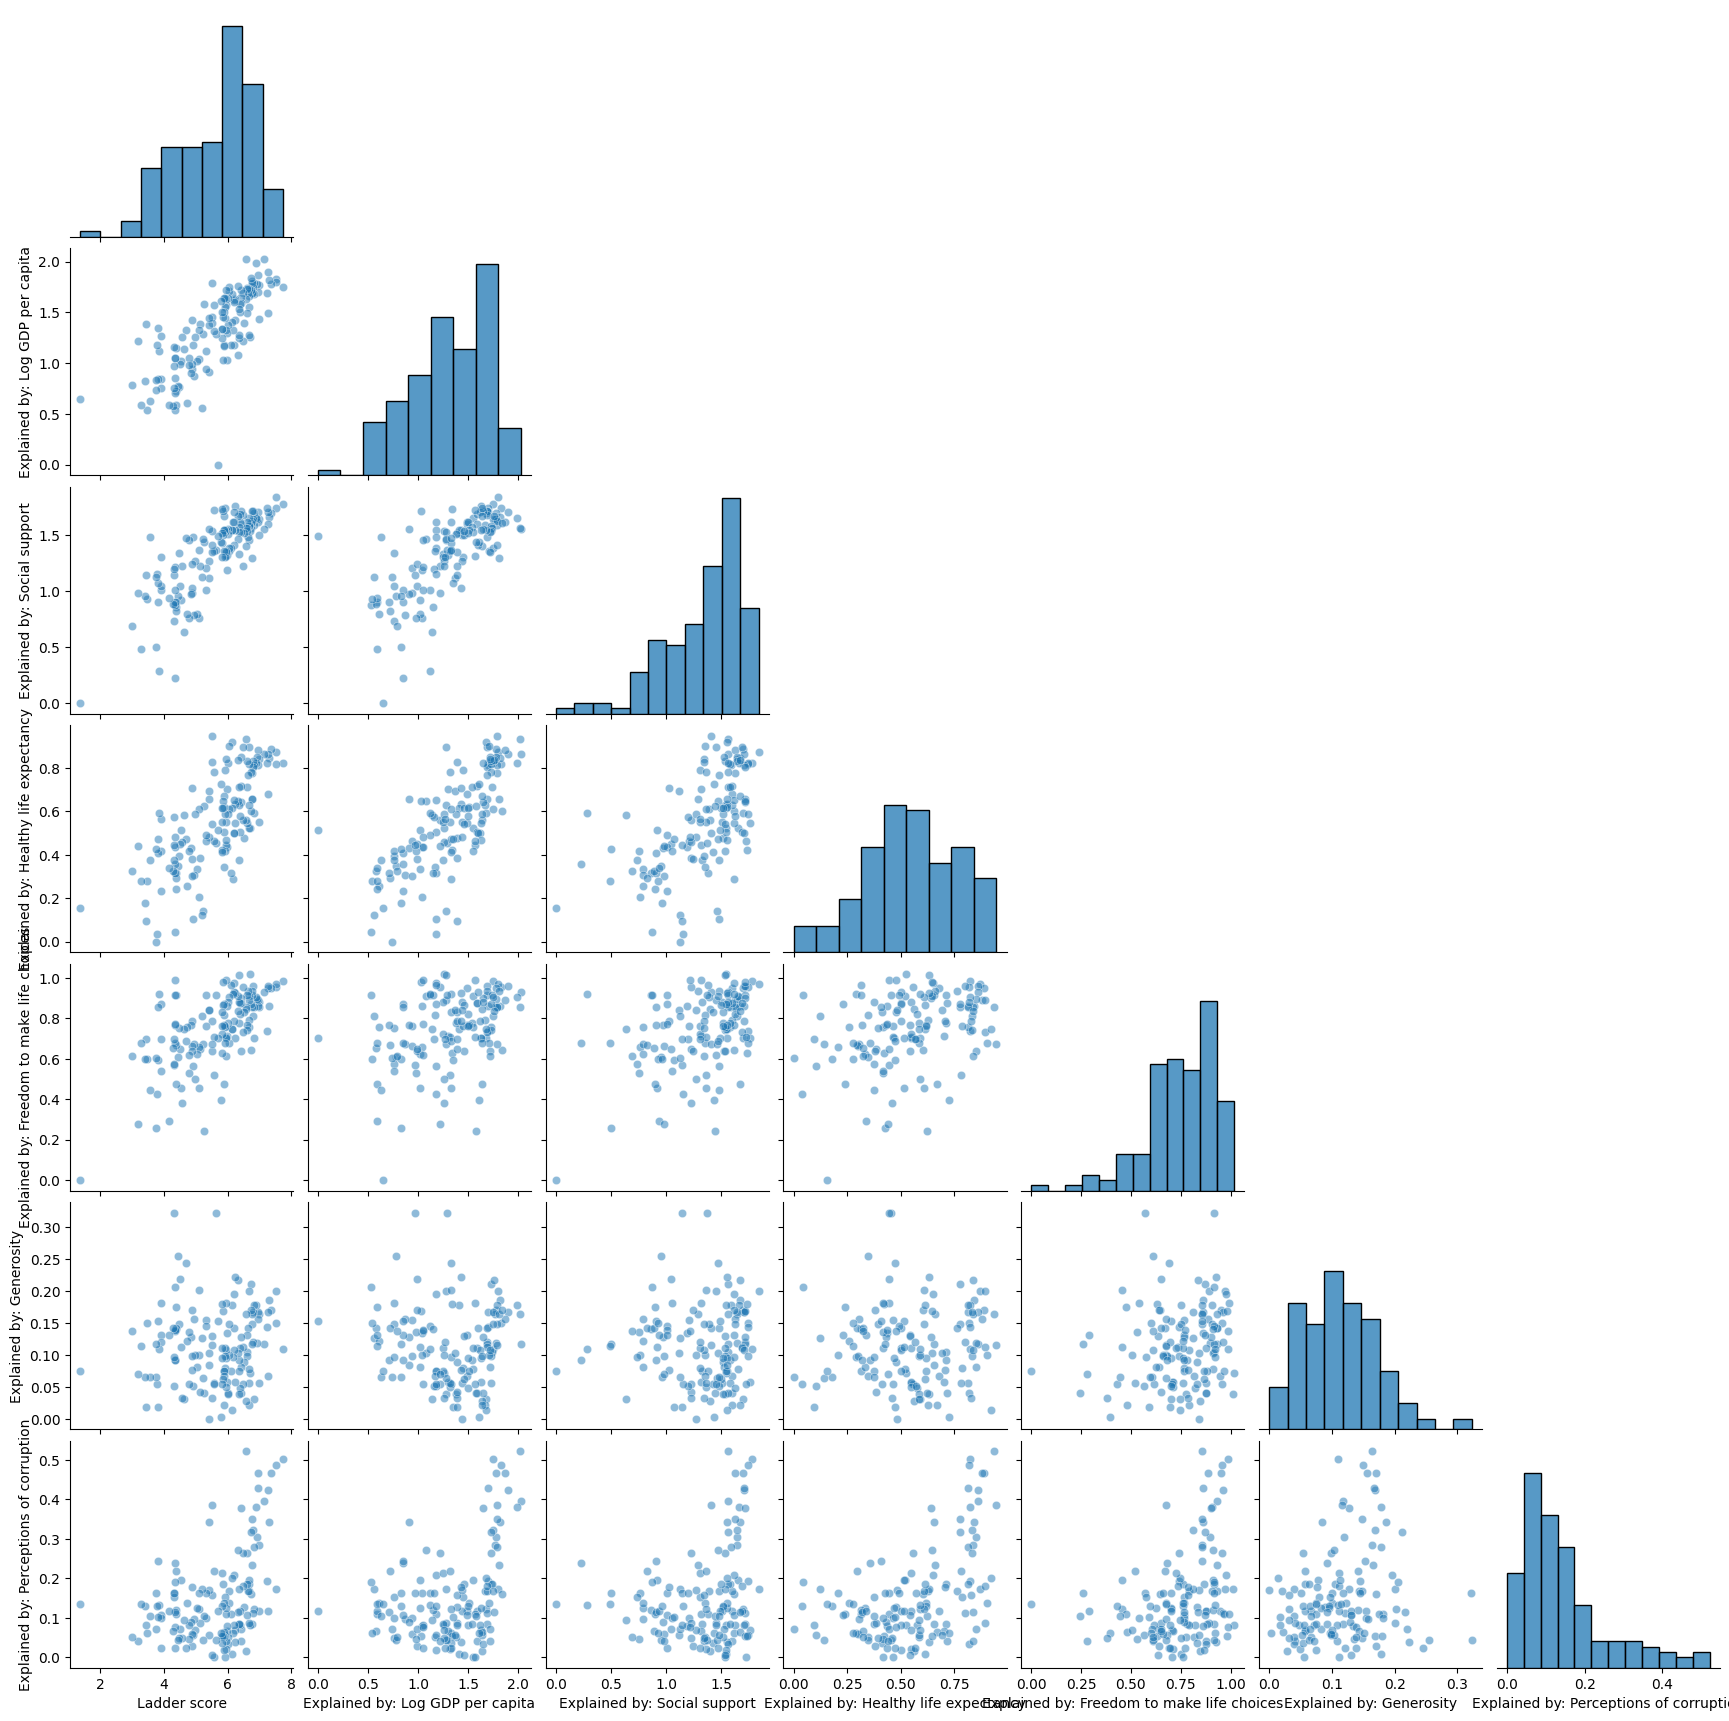

In [166]:
factors = [
    'Ladder score',
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption'
]
plt.figure(figsize=(10,8))
sns.pairplot(d24[factors], corner=True, plot_kws={'alpha':0.5})
plt.savefig("figures/pairplot.png", dpi=300, bbox_inches="tight")

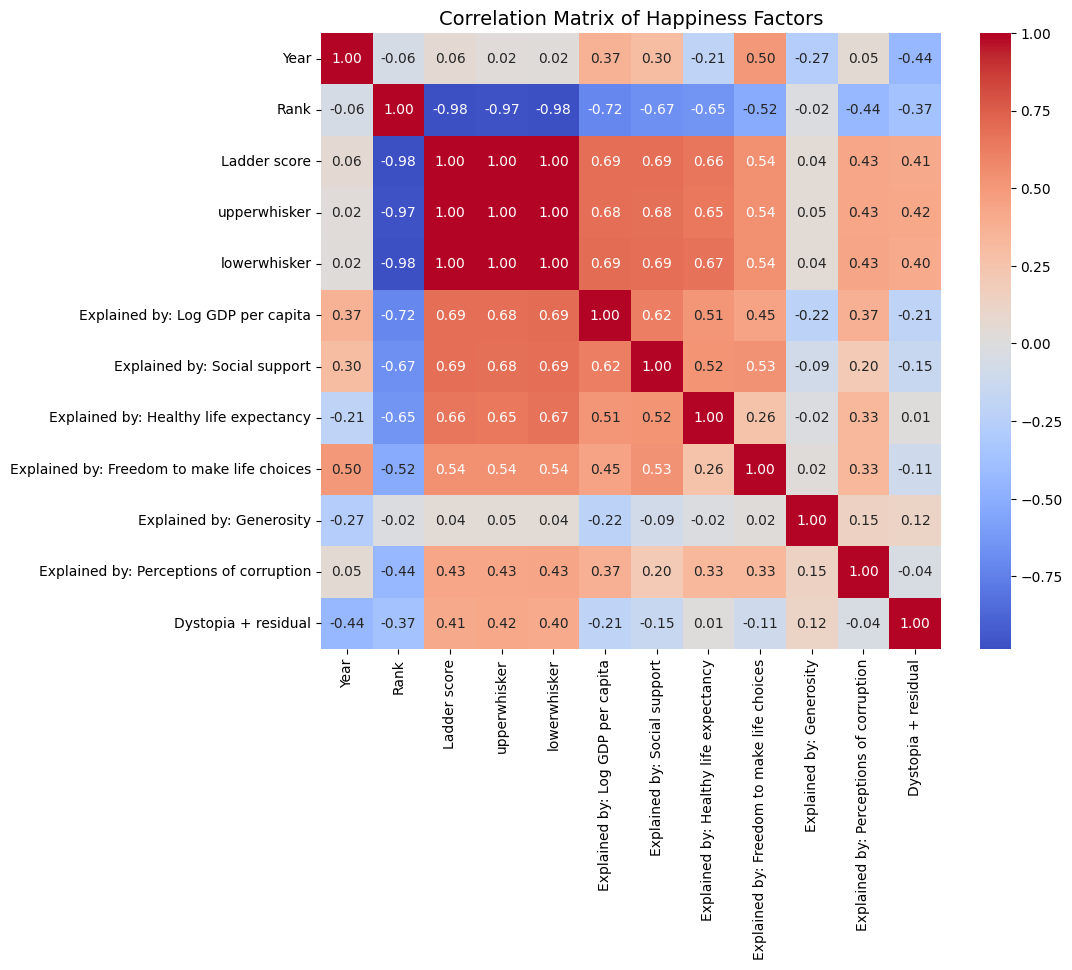

In [165]:
numeric = gallup.select_dtypes(include=['float64','int64'])

# compute correlation
corr = numeric.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Happiness Factors", fontsize=14)
plt.savefig("figures/CortelationMatrix.png", dpi=300, bbox_inches="tight")
plt.show()

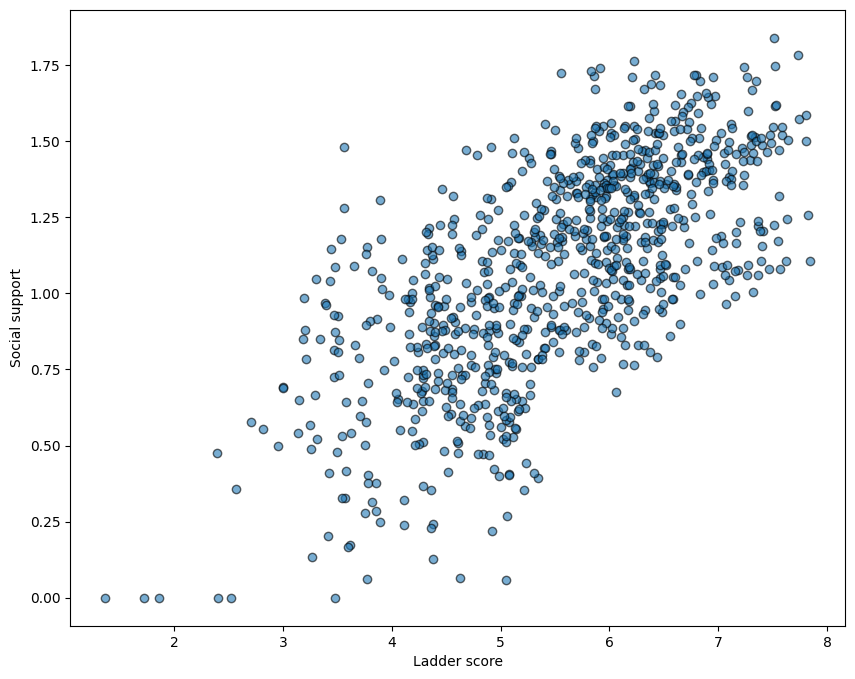

In [167]:
x = gallup['Ladder score']
y = gallup['Explained by: Social support']

plt.figure(figsize=(10,8))
plt.scatter(x, y, alpha=0.6, edgecolor='k')

plt.xlabel('Ladder score')
plt.ylabel('Social support')
plt.savefig("figures/SocialSupportVSLadderScore.png", dpi=300, bbox_inches="tight")
plt.show()

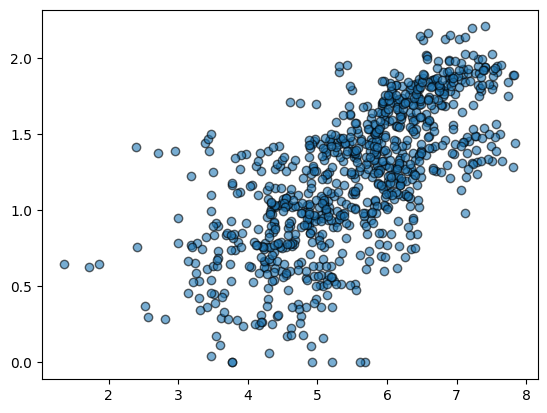

In [71]:
plt.scatter(gallup['Ladder score'], gallup['Explained by: Log GDP per capita'], alpha=0.6, edgecolor='k')

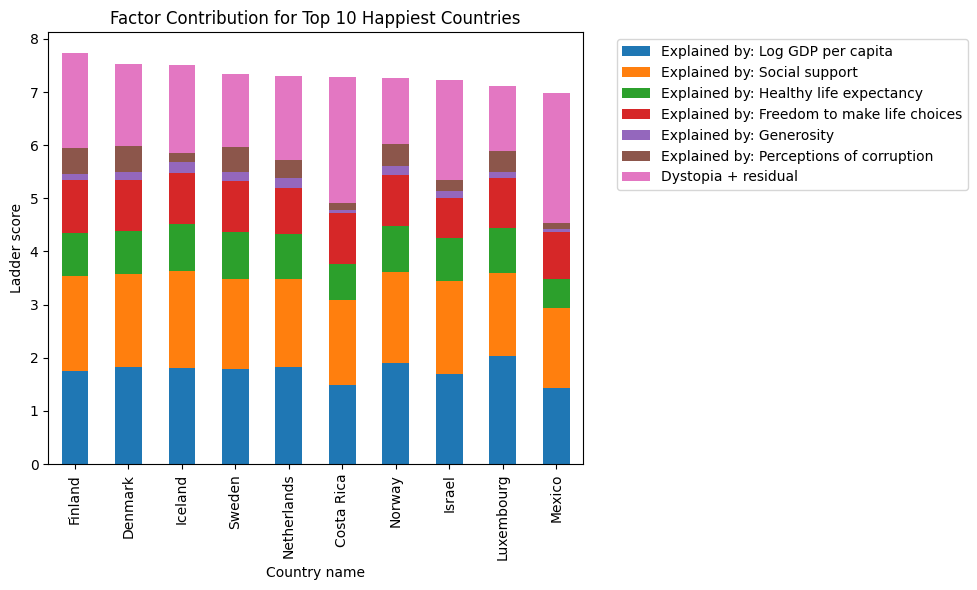

In [169]:
factors = [
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption',
    'Dystopia + residual'
]

happiest.set_index('Country name')[factors].plot(
    kind='bar', stacked=True, figsize=(10,6)
)
plt.title("Factor Contribution for Top 10 Happiest Countries")
plt.ylabel("Ladder score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # move legend outside
plt.tight_layout()
plt.savefig("figures/LadderScoreByFactors.png", dpi=300, bbox_inches="tight")
plt.show()

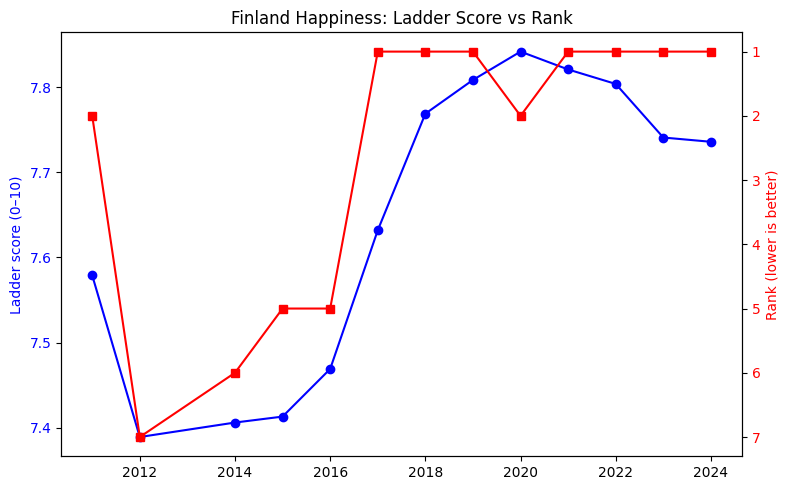

In [170]:
finland = gallup[gallup['Country name']=='Finland'][['Year', 'Rank', 'Ladder score']].sort_values('Year')

fig, ax1 = plt.subplots(figsize=(8,5))

# Left axis → Ladder score
ax1.plot(finland['Year'], finland['Ladder score'], color='blue', marker='o', label='Ladder score')
ax1.set_ylabel("Ladder score (0–10)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right axis → Rank
ax2 = ax1.twinx()
ax2.plot(finland['Year'], finland['Rank'], color='red', marker='s', label='Rank')
ax2.invert_yaxis()  # so Rank 1 is at the top
ax2.set_ylabel("Rank (lower is better)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Finland Happiness: Ladder Score vs Rank")
fig.tight_layout()
plt.savefig("figures/Finland-LadderVsRank.png", dpi=300, bbox_inches="tight")
plt.show()

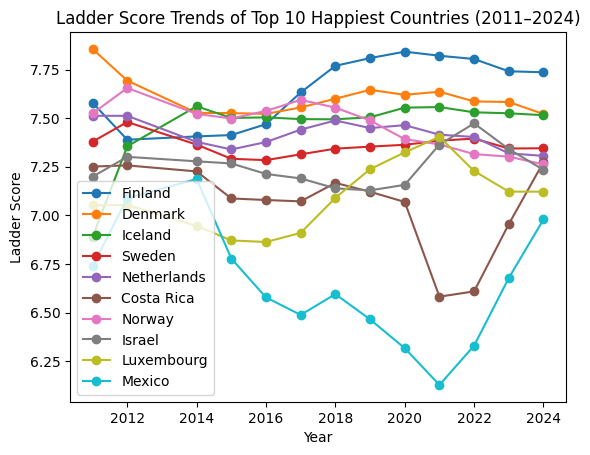

In [172]:
for c in happiest['Country name']:
    country = gallup[gallup['Country name']==c][['Year','Ladder score']].sort_values('Year')
    plt.plot(country['Year'], country['Ladder score'], marker = 'o', label = c)


plt.legend()
plt.title("Ladder Score Trends of Top 10 Happiest Countries (2011–2024)")
plt.xlabel("Year")
plt.ylabel("Ladder Score")
plt.savefig("figures/LadderScoreTrends.png", dpi=300, bbox_inches="tight")
plt.show()


In [101]:
d24[['Country name', 'Continent', 'Region' ,'Dystopia + residual']].fillna(0).sort_values('Dystopia + residual').head(10)

,Country name,Continent,Region,Dystopia + residual
1769,Sri Lanka,Asia,Southern Asia,-0.099
673,Oman,Asia,Western Asia,0.000
1403,State of Palestine,Asia,Western Asia,0.000
1174,Tajikistan,Asia,Central Asia,0.000
1892,Botswana,Africa,Southern Africa,0.012
1931,Lebanon,Asia,Western Asia,0.150
1148,Hong Kong SAR of China,Asia,Eastern Asia,0.168
1791,Egypt,Africa,Northern Africa,0.210
1956,Afghanistan,Asia,Southern Asia,0.348
1814,Tanzania,Africa,Eastern Africa,0.380


In [102]:
d24[['Country name' ,'Dystopia + residual', 'Continent', 'Region']].fillna(0).sort_values('Dystopia + residual').tail(10)

,Country name,Dystopia + residual,Continent,Region
748,Philippines,2.079,Asia,South-eastern Asia
1275,Côte d’Ivoire,2.176,Africa,Western Africa
495,El Salvador,2.211,America,Central America
340,Belize,2.218,America,Central America
826,Honduras,2.229,America,Central America
1249,Mozambique,2.262,Africa,Eastern Africa
576,Guatemala,2.365,America,Central America
71,Costa Rica,2.369,America,Central America
122,Mexico,2.438,America,Central America
1068,Venezuela,2.701,America,South America


In [110]:
pre_covid = gallup[gallup['Year']==2019]['Ladder score'].mean()
during_covid = gallup[gallup['Year']==2020]['Ladder score'].mean()
post_covid = gallup[gallup['Year']==2021]['Ladder score'].mean()
print(pre_covid, during_covid, post_covid)


5.4732398628409396 5.532838926174497 5.553575342465753
